# Exercise 2b: Arithmetic and Aggregation

## Aim: Learn to do computation with xarray

Find the teaching materials here: https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html

### Issues covered: 
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [2]:
import xarray as xr 
ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature = ds.temp
temperature

<xarray.DataArray 'temp' (t: 1, depth: 20, latitude: 144, longitude: 288)> Size: 3MB
[829440 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * depth      (depth) float32 80B 5.0 15.0 25.0 ... 4.577e+03 5.192e+03
  * t          (t) object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

Q2. Let's compare the data between the sea surface and further down. Create two temperature datasets and extract the temperature change data the sea surface and the sea bottom

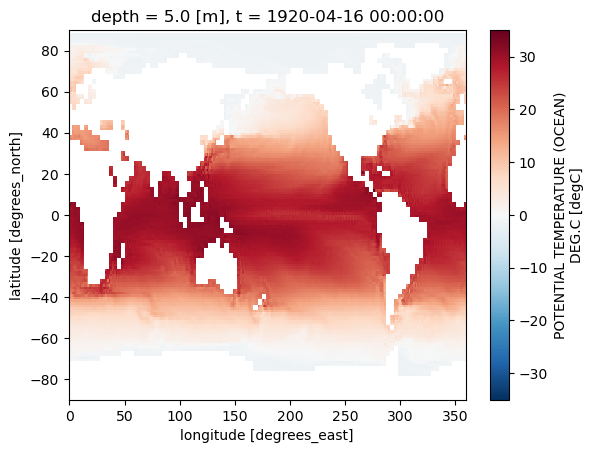

In [15]:
min_depth = min(temperature['depth'])
max_depth = max(temperature['depth'])
temp_1 = temperature.sel(depth=min_depth, method='nearest')
temp_2 = temperature.sel(depth=max_depth, method='nearest')

temp_1.plot()

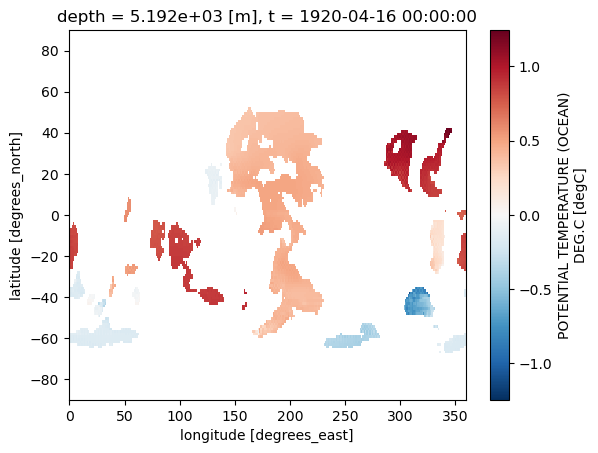

In [16]:
temp_2.plot()

Q3. Calculate the difference in temperature the bottom of the ocean and the surface.

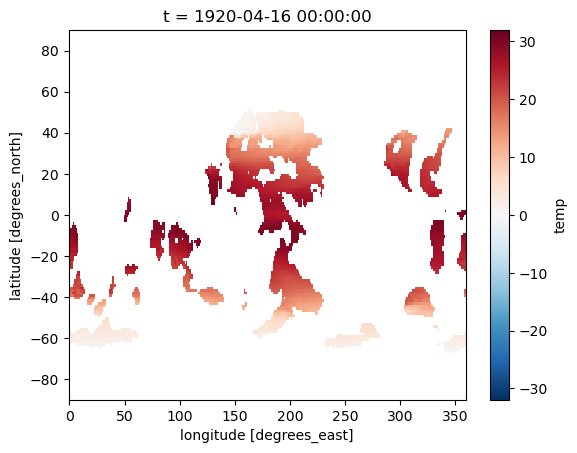

In [18]:
diff = temp_1 - temp_2
diff.plot()

Q4. Plot the difference in these temperatures using xarrays built-in features.

Q5. Calculate the **minimum** temperature across the water depth in all locations.

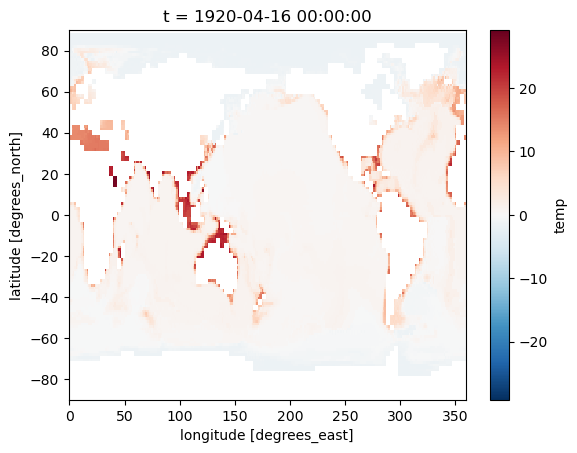

In [22]:
temperature.min(dim='depth').plot()

Q6. Compute the global average ocean temperature change (averaged over all depths) for the entire time period in the dataset. Then display the result as a 2D depth profile.

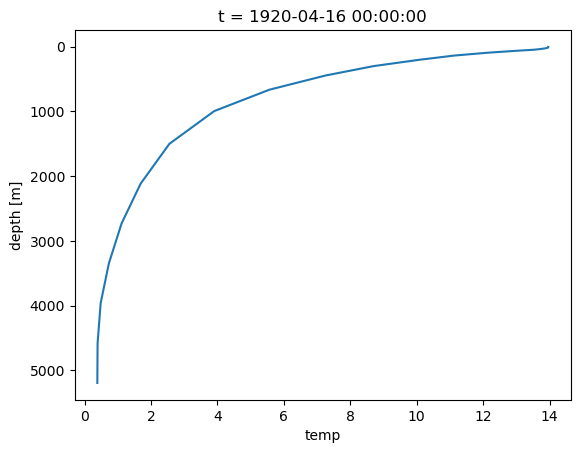

In [26]:
gbl_avg = temperature.mean(dim=['latitude', 'longitude'])
gbl_avg.plot(y='depth')
plt.gca().invert_yaxis()

Q7. Calculate the zonal average temperature change for each latitude. Plot the result as a 2d contour with depth on the y axis and latitude on x.